In [5]:
#jai saraswati mata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

###**loading the dataset**

In [6]:
#loading the data set
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df=pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


**Exploratory data anlysisn on our final data frame**

-previously, we examined the various tables in data base to identyfy key variables ,understand there relationships, and determine which one should be included in the final analysis.

-In thise phase of EDA, we will analyze the resultant to gain insights into the distribbution of each column.thise will help use to under stand the data patterns , identify anomalies, and ensure data quality before proceeding with further analysis.

In [7]:
# summery statistics 
df.describe().T#transpose

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


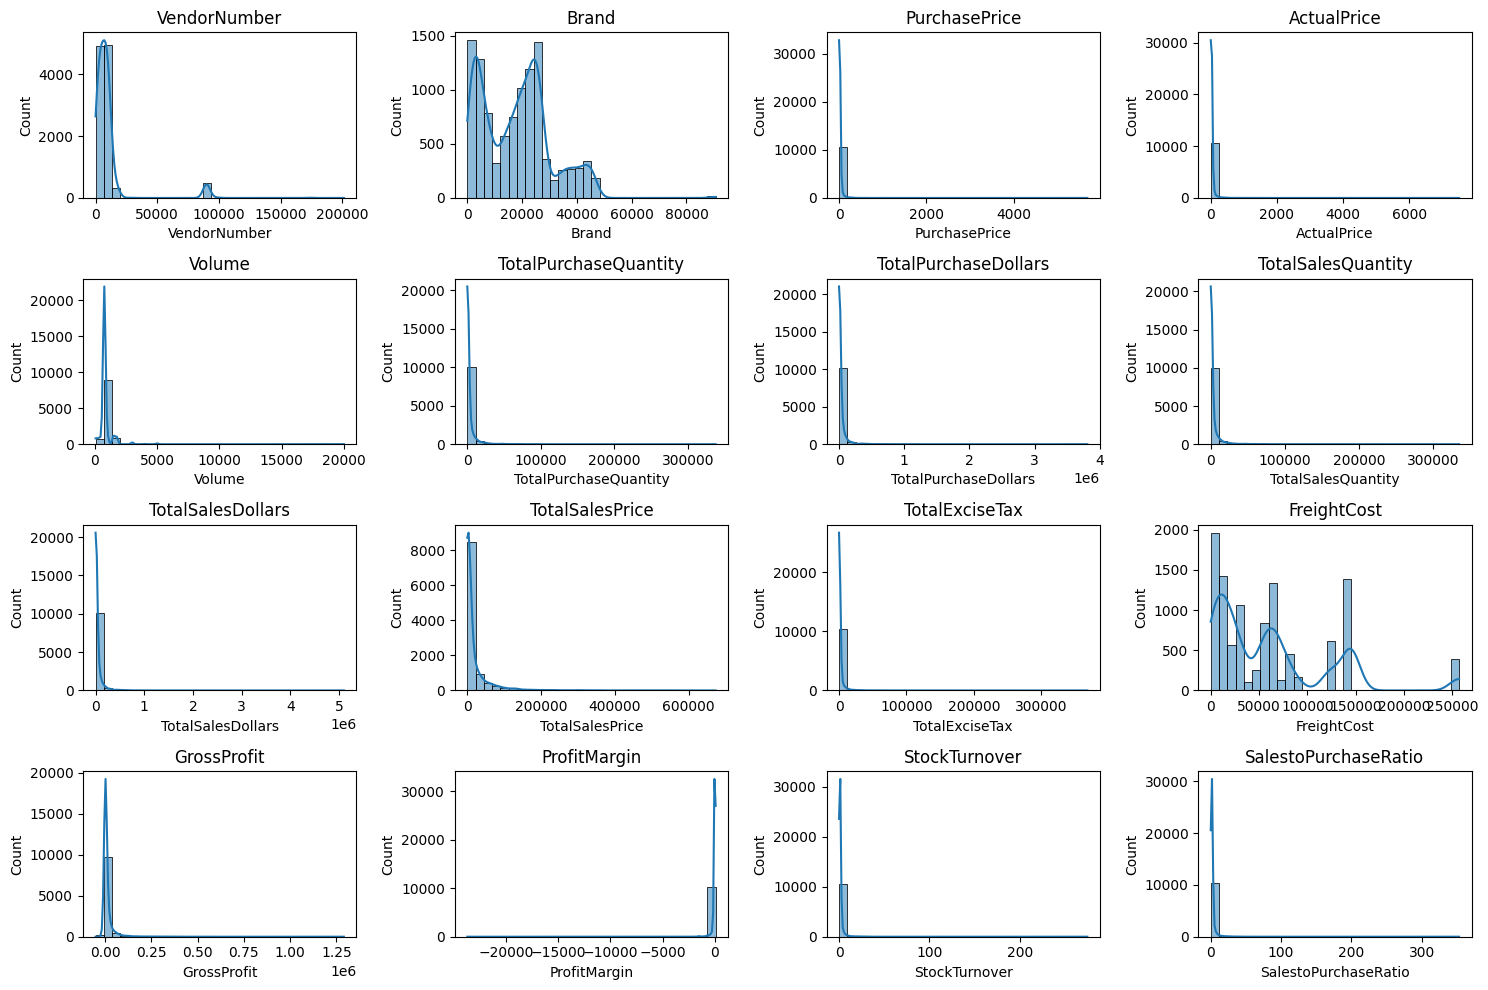

In [8]:
#distributon plots for numberical colums.
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) # Adjust gride layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

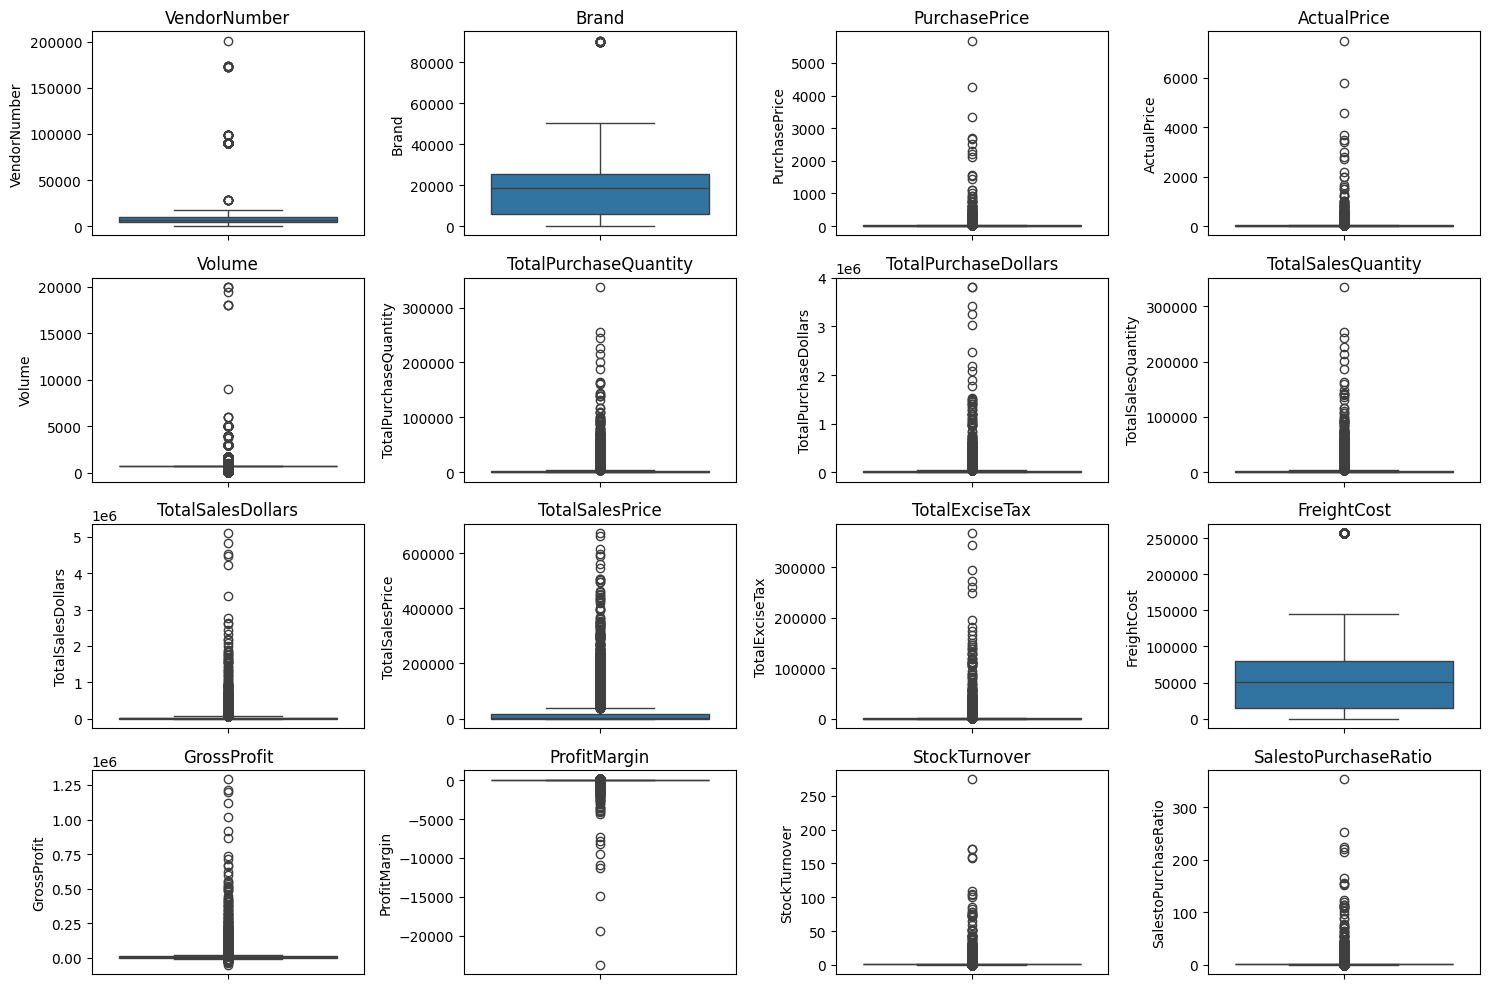

In [9]:
#outlier detection with Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #adjust gride layout as needed.
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()
     

**Summery Statistics insights**

**Negative & zero values**

##GrossProfit-Minimum value is -52,002.78, indicating losses.Some products or transactions may be selling at the loss due to high cost or selling at discounts lower than the purchase price.

##profit Magin-Has a minimum of -infinite,which suggests cases where revenue is zero or even lower than costs.

##TotalSalesQuantity & Total Sales Dollars-Minimum value are 0, meanign some products were purcahsed but never sold.These could be slow-moving or obsolete stock.

**outliers Indicated by High standerd daviation :**

##Purchase & actual Prices: The max velues(5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64) , indicating potential premium 
##products.

##freight Cost: Huge variation, from 0.09 to 2,57,032.07 , suggests logistics inefficiencies or bulk shipments.

##Stock Turnover: Ranges from zero to 274.5,implying some products sell extremely fast while other reamins in stock indefinitely.Value more than 1 indicates that .sold quentity for that product is higher than purcahsed quantity due to either sales are being fullfilled  from older stock.



In [10]:
#we will not remove all the outlayers because here is the hace of outlayers are belongs to the premium brands.so that we have to identify these type of brands.
#we will only remove the inconsistnece OUTLAYERS like gross profit, profit margin etc becaue they are also below zero. we will only work on the anbove zero.
#lets filter the data by re moving inconsistecies.
df = pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
where GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""",conn) 


In [11]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


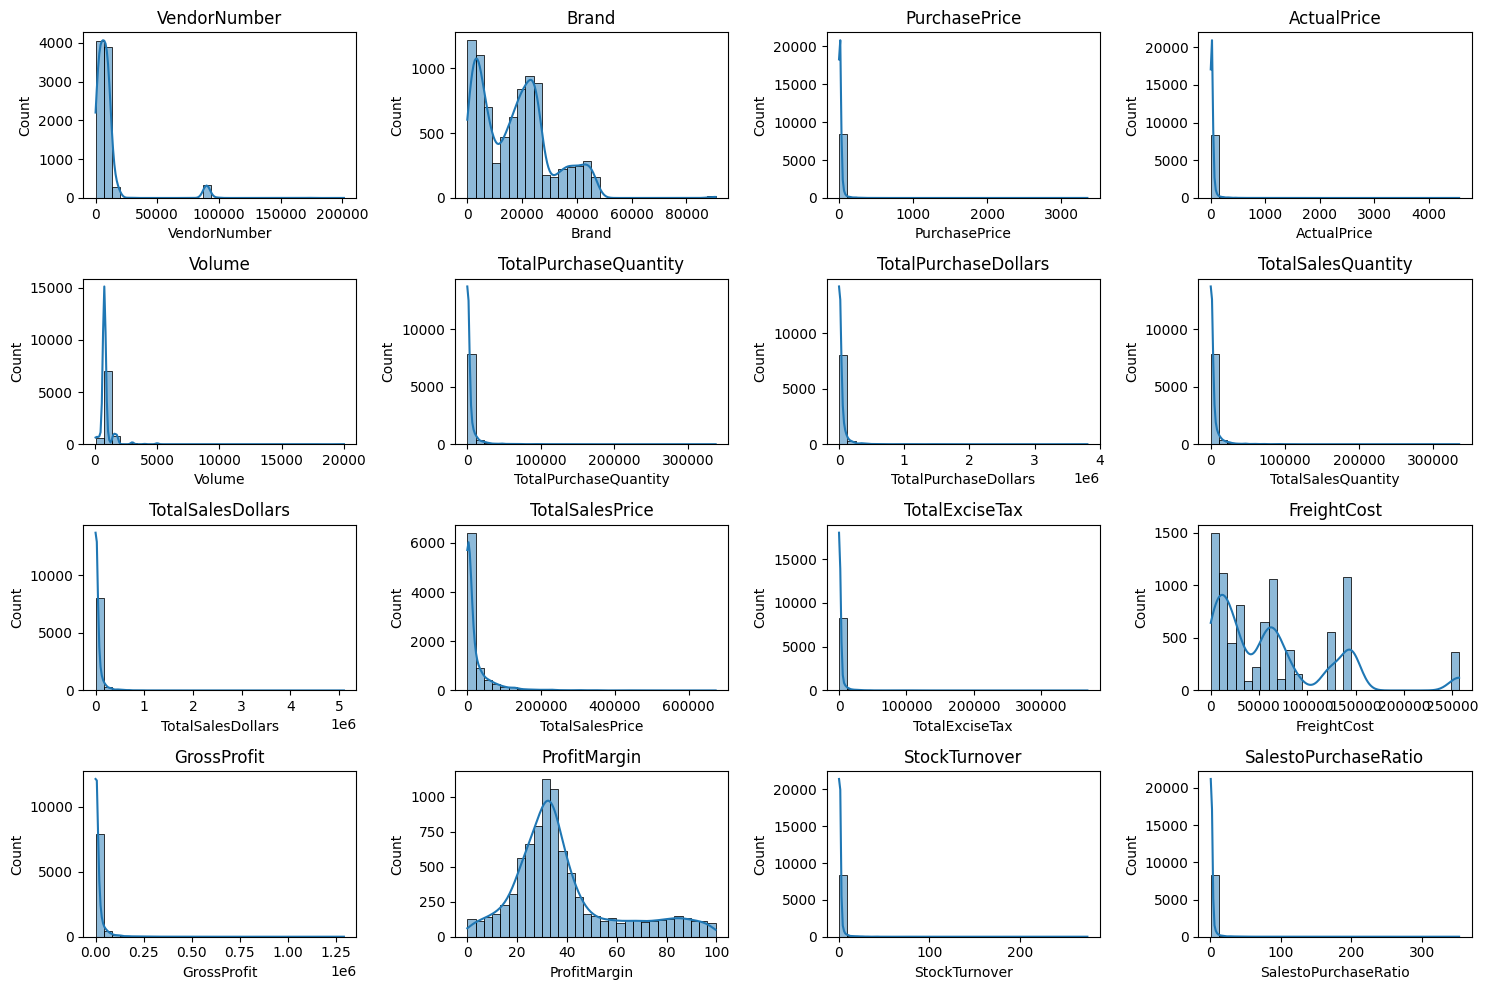

In [12]:
#Again we will plot the graph after cleanign the data.
#distributon plots for numberical colums.
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) # Adjust gride layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

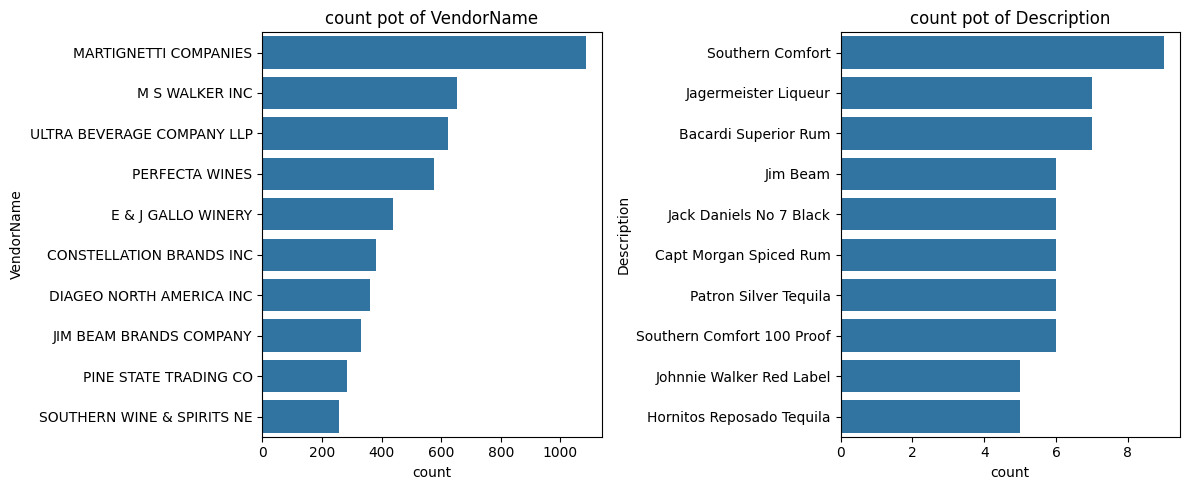

In [13]:
#dscription is product name.
#cout plots for catagorical columns
categorical_cols = ["VendorName", "Description"]
plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order= df[col].value_counts().index[:10]) #top 10 catogories.
    plt.title(f"count pot of {col}")
plt.tight_layout()
plt.show()
#now we have clearely shown the distribution of numerical and variable.

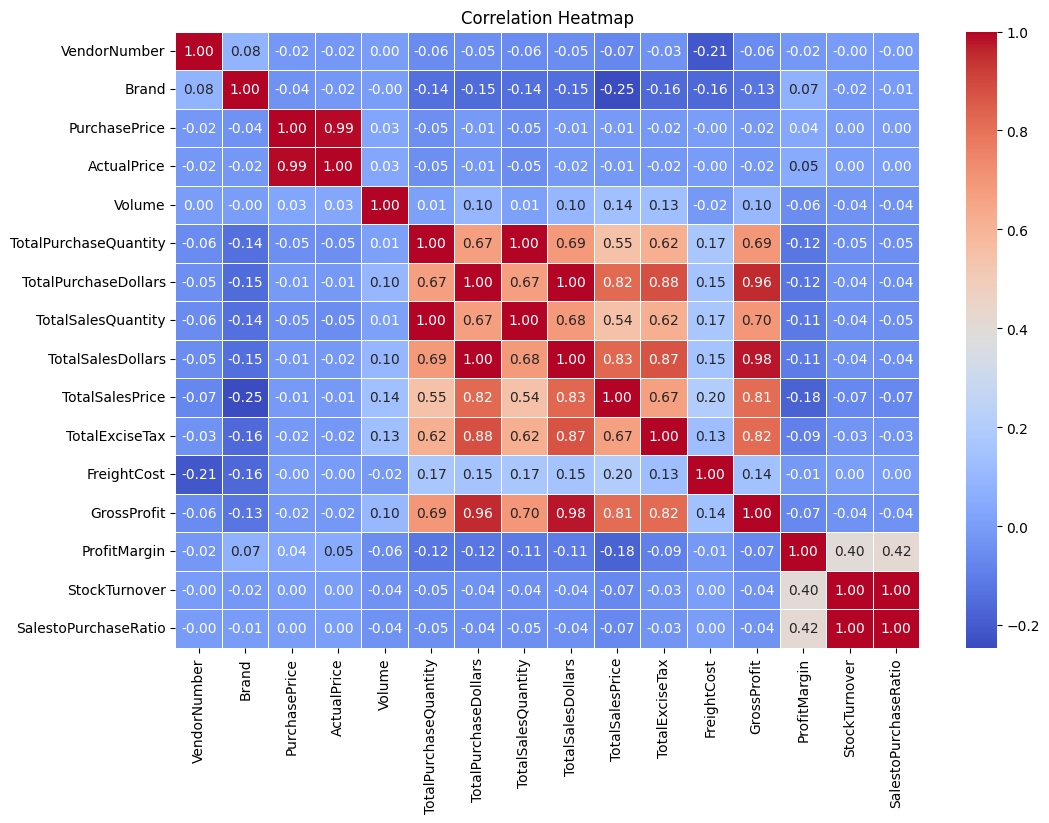

In [14]:
#now we will see the how much variables are related to each other.
#corelation heatmap is the best way to plot the relation between two variables.
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot= True, fmt=".2f",cmap= "coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#means  if we will increse the purchase price it will not effoct the total salesdollers or grossProfit.

**Correlation insights**

#purchae price has week CORRELATION with TotalSalesDollars (-0.012) and GrossProfit (-0.016) ,suggesting that price variation do not significantly impact sales revenue or profit.

#Strong correlation between total Puchase quantity and total sales quantity (0.999),confirming efficient inventory turnover .#stock me jo bhi hai vo sal sale hota jss rha hai.

#Negative correlation between profit margin & total sales price (-0.179).suggests that as sales price increases,margins decreases, possibly due to competitive pricing preasures.

#StockTurnover has weak negatinve correlation with both GrossProfit.(-0.038) and Profit Margin (-0.055),indicates that fater turnover does not necessarily result in higher profitabilty.

**Resurch Question**

**Data Anlysis**

##identify Brands that needs Promotional  or Pricing Adjusments which exhibit lower sales performence but higher profit margins.

In [15]:
brand_performance =  df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [16]:
#deciding the threshold 
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold =  brand_performance['ProfitMargin'].quantile(0.85)

In [17]:
low_sales_threshold

np.float64(560.299)

In [18]:
high_margin_threshold

np.float64(64.97017552750113)

In [19]:
#Filter brands with low sales but high profit margins.
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
    ]
print('Brands with low sales but hight profit margins:')
display(target_brands.sort_values('TotalSalesDollars'))
#these brands need to adevertisement and pricint margin adjustment.so that we can increase the sales revenue.


Brands with low sales but hight profit margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [20]:
 #for better visualization
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]

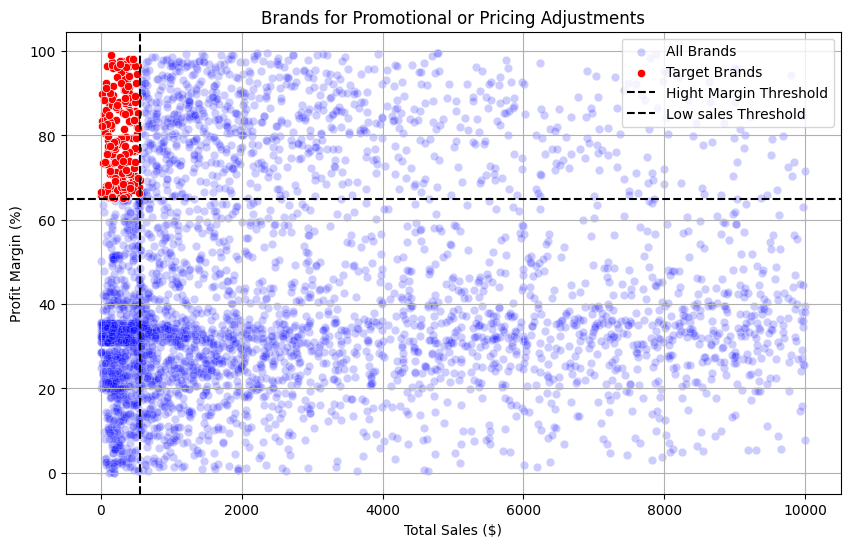

In [21]:
#for these we use the scatteret plot.
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars',y='ProfitMargin',color='Blue', label='All Brands',alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='ProfitMargin',color='Red', label='Target Brands')

plt.axhline(high_margin_threshold, linestyle='--',color='black',label='Hight Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='Low sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brands for Promotional or Pricing Adjustments')
plt.legend()
plt.grid(True)
plt.show()




**resurch question no 2**

question->Whic vendors and brands demonstrate the highest sales performence?


In [22]:
#we need to write a function for readinng the Dollars .
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >=1_000:
        return f"{value / 1_000:.2f}K"
    else :
        return str(value)
        

In [23]:
#Top vendor & Brand by Sales Performance.
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors


VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [24]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [25]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

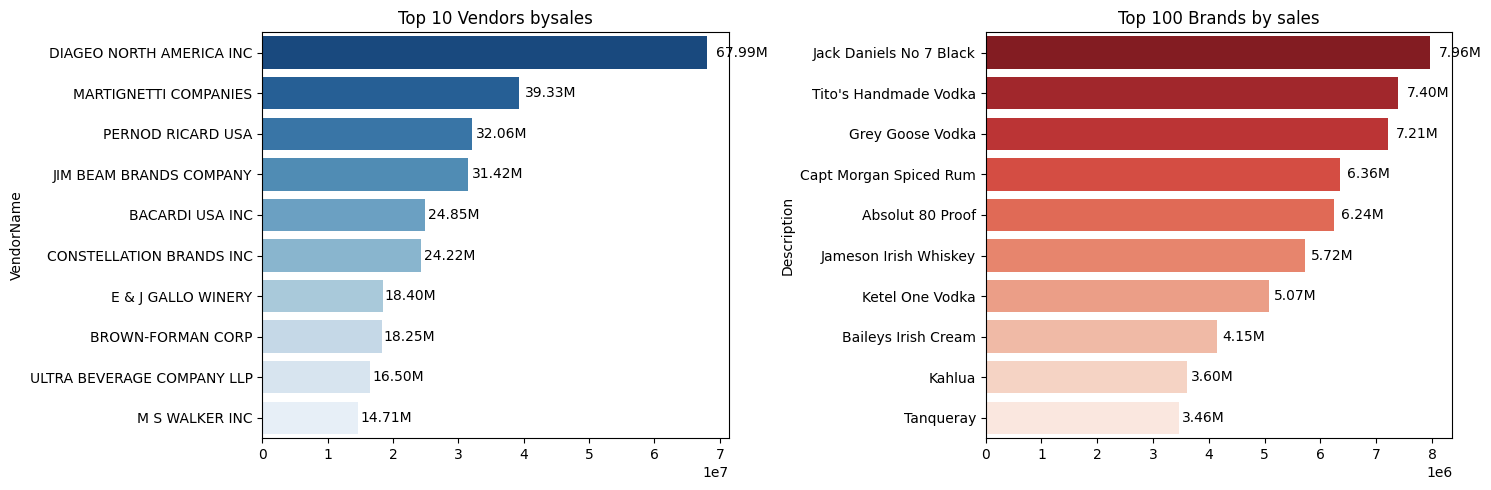

In [26]:
#now we will write the script of bar plot for ploting the both data.
#plot for Top vendors.
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index,x=top_vendors.values,palette="Blues_r")
plt.title("Top 10 Vendors bysales")

#thise is for bar value acording to width and hight .
for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left' , va = 'center' ,fontsize = 10, color= 'black')


#plot for Brands
plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 100 Brands by sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize = 10 ,color = 'black')

plt.tight_layout()
plt.show()

             


In [27]:
## **Resurch Question no 03**

### Question->Which vendor contribute the most to total purcahse dollars?

In [28]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [30]:
#now we will create a new colloum purchase contribution in (%) for fiding the contribution of each vendor .
vendor_performance['Purchase_Contribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()

In [31]:
vendor_performance = round(vendor_performance.sort_values('Purchase_Contribution%',ascending = False),2)

In [32]:
#display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,0.08
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.05
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.04
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.04
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.04
53,M S WALKER INC,9.76M,4.94M,14.71M,0.03


In [33]:
top_vendors['Purchase_Contribution%'].sum()

np.float64(0.6600000000000001)

In [34]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum() 

In [35]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16,0.16
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,0.08,0.24
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08,0.32
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08,0.40
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06,0.46
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.05,0.51
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.04,0.55
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.04,0.59
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.04,0.63
53,M S WALKER INC,9.76M,4.94M,14.71M,0.03,0.66


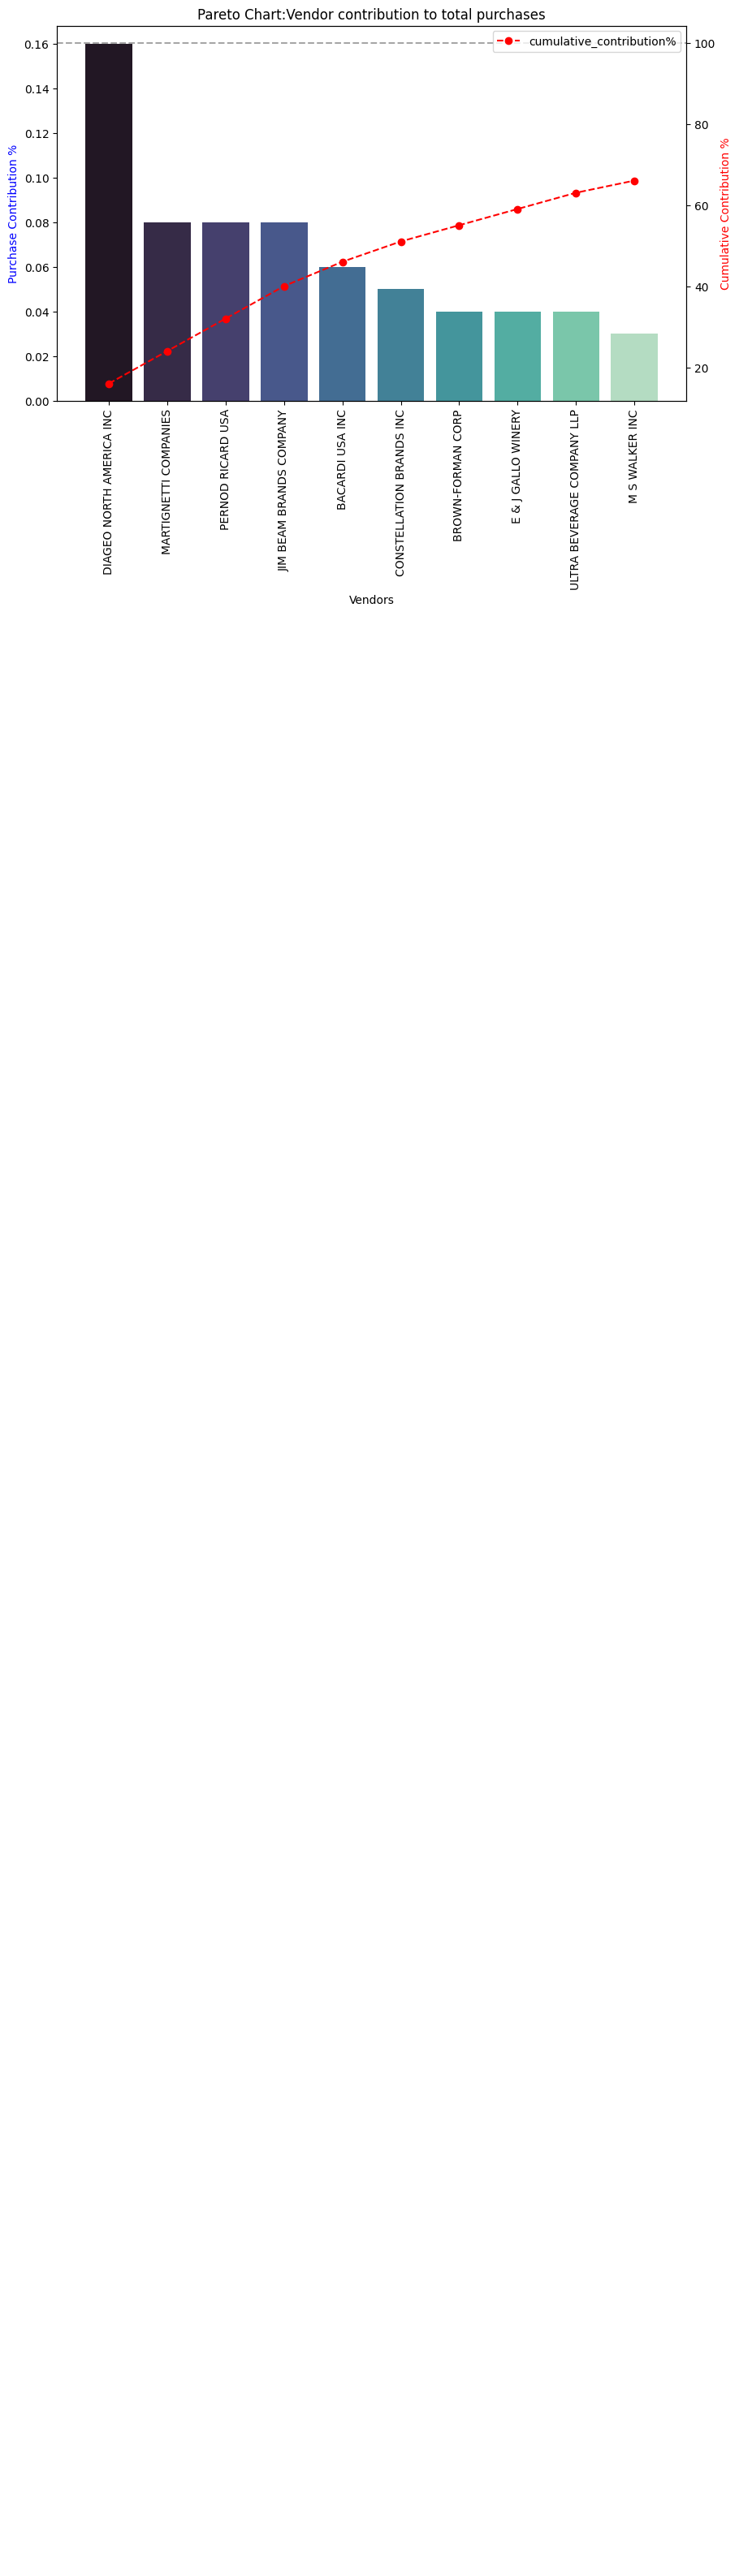

In [36]:
#Now we will use the parito chart because we want to show the cumulative graph + Bar chart.
#parito chart
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()*100
fig, ax1 = plt.subplots(figsize=(10,6))

#Bar plot for purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'],palette='mako',ax=ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value-1 ,str(value)+'%' , ha='center' ,fontsize=10,color='white')

#line plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'],color='red', marker='o' ,linestyle='dashed',label='cumulative_contribution%')

ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)
ax1.set_ylabel('Purchase Contribution %', color= 'blue')
ax2.set_ylabel('Cumulative Contribution %', color= 'red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart:Vendor contribution to total purchases')

ax2.axhline(y=100, color='gray' ,linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')


plt.show()

## ***Reserch Question no 3***

### **How much of total procurement is dependent on the top vendors?**


In [37]:
#jay saraswati mata
print(f"Total Purchase Contribution of top 10 vendore is {round(top_vendors ['Purchase_Contribution%'].sum()*100,2)})%")


Total Purchase Contribution of top 10 vendore is 66.0)%


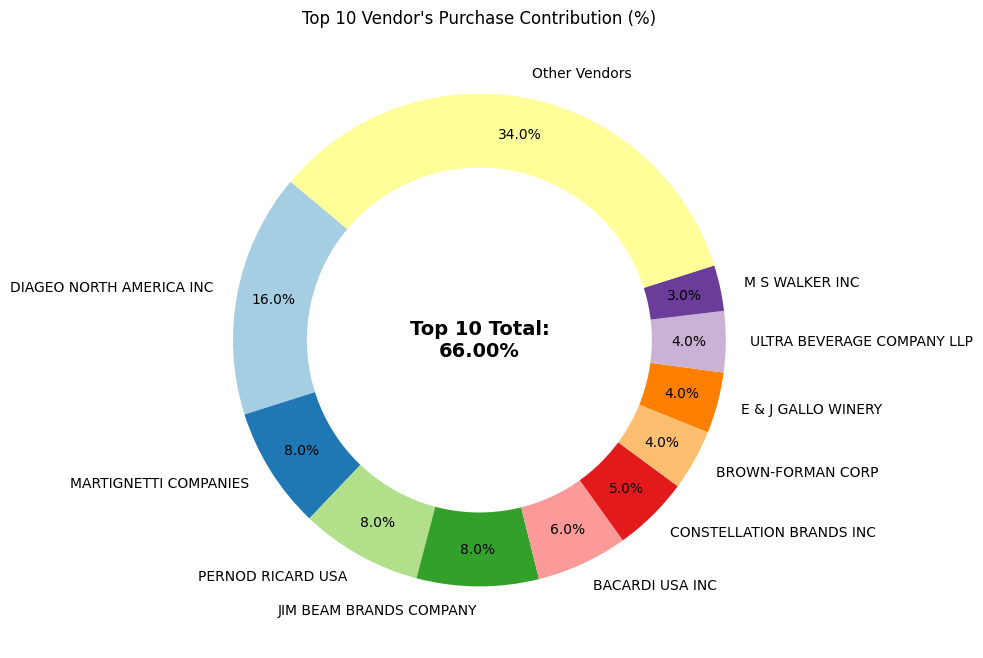

In [38]:
#for repesenting thise we can use both pi chart and donat chart .but when we have column greater than 5 we should have to use donat chart.
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)
purchase_contributions = [x * 100 for x in purchase_contributions]
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

#Appent Other vendor catagory.
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

#Donat Chart
fig, ax = plt.subplots(figsize=(8,8))
wedges,texts,autotexts = ax.pie(purchase_contributions,labels = vendors,autopct='%1.1f%%',
                                startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors)


#draw the white circle in the centre to create the 'donut' effect.
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

#add total Contribution annotation in the centre.
plt.text(0,0,f"Top 10 Total:\n{total_contribution:.2f}%",fontsize=14,fontweight='bold',ha='center',va='center')
plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()



## **Resurch question no 4**

### Does purchasing in bulk redurce the unite price,and what is the optimal purcahse volume cost savings?

In [39]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [40]:
df['Ordersize'] = pd.qcut(df['TotalPurchaseQuantity'],q=3,labels=['Small','Medium','Large'])

In [41]:

#now we will find in which purchase quantity catogery we have to pay big unit purchase price.
df.groupby('Ordersize')[['UnitPurchasePrice']].mean()


,UnitPurchasePrice
Ordersize,
Small,39.068186
Medium,15.486414
Large,10.777625


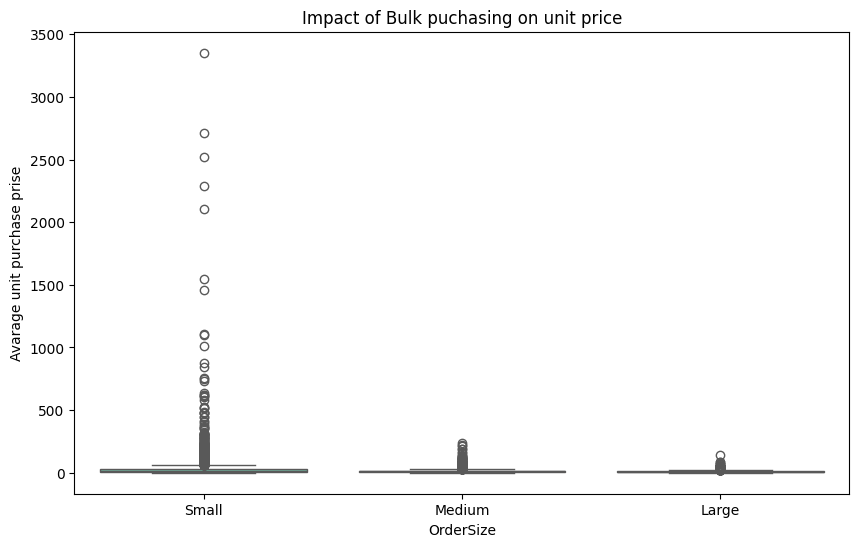

In [42]:
#now we will see the same thing using out layers.
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Ordersize',y='UnitPurchasePrice',palette="Set2")
plt.title('Impact of Bulk puchasing on unit price')
plt.xlabel('OrderSize')
plt.ylabel('Avarage unit purchase prise')
plt.show()


 ### 1.Vendor buying in bulk(Large Order size) get the lowest unit price ($10.78 per unit), meanings if they can manage inventory efficiently.

 ### 2.The price differnece between small and Large orders is substantial (~72% reduction in unit cost).

 ### 3.Thise suggest that bulk pricing Stratigies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unitrevenue.

## **resurch questiion no.4**
#### Which vendor have low inventory turnover,indicating excess stock and slow-moving products?


In [43]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending= True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


## **resurch Question no 04**
### How much capital is locked in unsold inventory , and which vendors contributes the most to it?


In [44]:
df['UnsoldInventoryValues'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValues'].sum()))

Total Unsold Capital: 2.71M


In [45]:
#Aggregate Capital Locked per vendor
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValues'].sum().reset_index()

#Sort vendor with the Highest Locked Capital.
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='UnsoldInventoryValues',ascending=False)
inventory_value_per_vendor['UnsoldInventoryValues'] = inventory_value_per_vendor['UnsoldInventoryValues'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValues
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors. 

In [46]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25 )

In [47]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold ]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [48]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [49]:
#now we will create the function for confidence intereval.
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data,ddof=1) / np.sqrt(len(data)) #srandard error
    t_critical = stats.t.ppf((1+confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val,mean_val - margin_of_error,mean_val + margin_of_error
    

Top Vendors 95% CI: (30.74,31.61),Mean: 31.18
low vendors 95% CI: (40.50,40.50),Mean:41.57


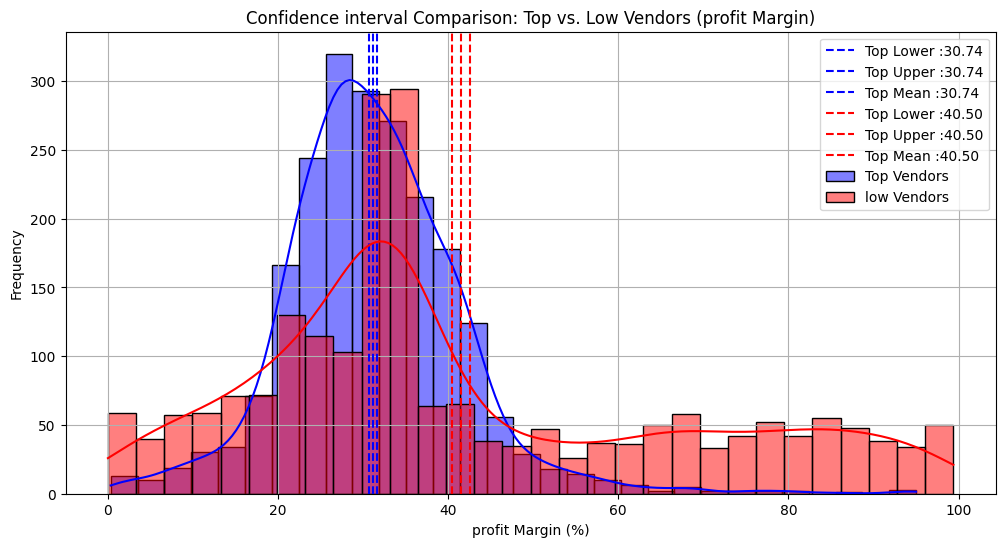

In [50]:
#Code for plot.
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean,low_lower,low_upper =  confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f},{top_upper:.2f}),Mean: {top_mean:.2f}")
print(f"low vendors 95% CI: ({low_lower:.2f},{low_lower:.2f}),Mean:{low_mean:.2f}")

plt.figure(figsize=(12,6))

#Top Vendors Plot
sns.histplot(top_vendors,kde=True,color='blue',bins=30,alpha=0.5,label='Top Vendors')
plt.axvline(top_lower,color='blue',linestyle='--',label=f"Top Lower :{top_lower:.2f}")
plt.axvline(top_upper ,color='blue',linestyle='--',label=f"Top Upper :{top_lower:.2f}")
plt.axvline(top_mean,color='blue',linestyle='--',label=f"Top Mean :{top_lower:.2f}")


#low vendors plot
sns.histplot(low_vendors,kde=True,color='red',bins=30,alpha=0.5,label='low Vendors')
plt.axvline(low_lower,color='red',linestyle='--',label=f"Top Lower :{low_lower:.2f}")
plt.axvline(low_upper ,color='red',linestyle='--',label=f"Top Upper :{low_lower:.2f}")
plt.axvline(low_mean,color='red',linestyle='--',label=f"Top Mean :{low_lower:.2f}")


#Finalize plot
plt.title('Confidence interval Comparison: Top vs. Low Vendors (profit Margin)')
plt.xlabel('profit Margin (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

#### 1.the confidence interval for low-performing interval (40.48% to 42.62%) is singnificantly Higher than the top perfroming vendors(30.74% to 31.61%).
#### 2.Thise suggest that vendors with lower sales tend to maintain higher profit margins.potemntially due to preminum pricing or low operational const.
#### 3.For high performing vendors: if they aim to improve profitability. they could explore selective price adjustment ,cost optimization,or bundeling strategies.
#### 4.For low performing vendors:Despite higher margins, their low sales volume might indicate a need for netter marketing,competitive pricing ,or improved distribution strategies.

### **Is there a significant difference in profit margins between top-performing and low-performing vendors?**
#### Hypothesis:
#### Ho(Null Hypothesis):There id no significant difference in the mean profit margin ot top-performing vendors.
#### H1(Alternative hutothesis):The mean profit margins of top-performing and low-performing vendors are significantly different.


In [51]:
#script fot testing here we are going to use t-test.
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25 )

top_vendors = df[df['TotalSalesDollars'] >= top_threshold ]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

#perform two sample t-test.
t_stat, p_value= ttest_ind(top_vendors,low_vendors,equal_var=False)

# print results.
print(f"T-statistics: {t_stat:.4f},p-value: {p_value:.4f}")
if p_value<0.05:
    print("Reject Ho: there is a significant difference in profit margins between top and low  performing vendors.")
else:
    print("Fail to Rehect Ho:no significant difference in profit margins.")
    


T-statistics: -17.6695,p-value: 0.0000
Reject Ho: there is a significant difference in profit margins between top and low  performing vendors.


In [52]:

#loading the data set
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df=pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()
 


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [53]:
# Export to CSV
df.to_csv("vendor_sales_summary.csv", index=False)


In [56]:
# Replace inf and -inf with NaN, then fill NaN with 0
df['ProfitMargin'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['ProfitMargin'].fillna(0, inplace=True)

In [57]:
# Export to CSV
df.to_csv("vendor_sales_summary.csv", index=False)